# Data exploration 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./data/marketing_campaign_dataset.csv') 
df

Campaign_ID              Company Campaign_Type Target_Audience  \
0                 1  Innovate Industries         Email       Men 18-24   
1                 2       NexGen Systems         Email     Women 35-44   
2                 3    Alpha Innovations    Influencer       Men 25-34   
3                 4   DataTech Solutions       Display        All Ages   
4                 5       NexGen Systems         Email       Men 25-34   
...             ...                  ...           ...             ...   
199995       199996             TechCorp       Display        All Ages   
199996       199997   DataTech Solutions         Email       Men 25-34   
199997       199998   DataTech Solutions  Social Media       Men 18-24   
199998       199999  Innovate Industries    Influencer        All Ages   
199999       200000  Innovate Industries  Social Media     Women 35-44   

       Duration Channel_Used  Conversion_Rate Acquisition_Cost   ROI  \
0       30 days   Google Ads             0.04       $16,174.00  6.29   
1       60 days   Google Ads             0.12       $11,566.00  5.61   
2       30 days      YouTube             0.07       $10,200.00  7.18   
3       60 days      YouTube             0.11       $12,724.00  5.55   
4       15 days      YouTube             0.05       $16,452.00  6.50   
...         ...          ...              ...              ...   ...   
199995  30 days   Google Ads             0.06       $18,365.00  2.84   
199996  15 days     Facebook             0.02        $8,168.00  4.14   
199997  45 days      Website             0.05       $13,397.00  3.25   
199998  30 days      YouTube             0.10       $18,508.00  3.86   
199999  45 days   Google Ads             0.01       $13,835.00  6.64   

           Location  Language  Clicks  Impressions  Engagement_Score  \
0           Chicago   Spanish     506         1922                 6   
1          New York    German     116         7523                 7   
2       Los Angeles    French     584         7698                 1   
3             Miami  Mandarin     217         1820                 7   
4       Los Angeles  Mandarin     379         4201                 3   
...             ...       ...     ...          ...               ...   
199995      Chicago    German     858         5988                 1   
199996      Chicago   Spanish     228         3068                 7   
199997     New York  Mandarin     723         9548                 3   
199998      Houston    French     528         2763                 1   
199999      Chicago   Spanish     924         7287                 8   

           Customer_Segment        Date  
0         Health & Wellness  2021-01-01  
1              Fashionistas  2021-01-02  
2       Outdoor Adventurers  2021-01-03  
3         Health & Wellness  2021-01-04  
4         Health & Wellness  2021-01-05  
...                     ...         ...  
199995     Tech Enthusiasts  2021-12-07  
199996              Foodies  2021-12-08  
199997     Tech Enthusiasts  2021-12-09  
199998              Foodies  2021-12-10  
199999     Tech Enthusiasts  2021-12-11  

[200000 rows x 16 columns]

In [3]:
df.dtypes

Campaign_ID           int64
Company              object
Campaign_Type        object
Target_Audience      object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost     object
ROI                 float64
Location             object
Language             object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
Date                 object
dtype: object

In [4]:
# Convert Acquisition_Cost 
df['Acquisition_Cost'] = (
    df['Acquisition_Cost']
    .replace('[\$,]', '', regex=True)
    .astype(float)
) 
df['Date'] = pd.to_datetime(df['Date']) 

#remove leading and trailing spaces from all columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df.dtypes


Campaign_ID                  int64
Company                     object
Campaign_Type               object
Target_Audience             object
Duration                    object
Channel_Used                object
Conversion_Rate            float64
Acquisition_Cost           float64
ROI                        float64
Location                    object
Language                    object
Clicks                       int64
Impressions                  int64
Engagement_Score             int64
Customer_Segment            object
Date                datetime64[ns]
dtype: object

In [5]:
df

Campaign_ID              Company Campaign_Type Target_Audience  \
0                 1  Innovate Industries         Email       Men 18-24   
1                 2       NexGen Systems         Email     Women 35-44   
2                 3    Alpha Innovations    Influencer       Men 25-34   
3                 4   DataTech Solutions       Display        All Ages   
4                 5       NexGen Systems         Email       Men 25-34   
...             ...                  ...           ...             ...   
199995       199996             TechCorp       Display        All Ages   
199996       199997   DataTech Solutions         Email       Men 25-34   
199997       199998   DataTech Solutions  Social Media       Men 18-24   
199998       199999  Innovate Industries    Influencer        All Ages   
199999       200000  Innovate Industries  Social Media     Women 35-44   

       Duration Channel_Used  Conversion_Rate  Acquisition_Cost   ROI  \
0       30 days   Google Ads             0.04           16174.0  6.29   
1       60 days   Google Ads             0.12           11566.0  5.61   
2       30 days      YouTube             0.07           10200.0  7.18   
3       60 days      YouTube             0.11           12724.0  5.55   
4       15 days      YouTube             0.05           16452.0  6.50   
...         ...          ...              ...               ...   ...   
199995  30 days   Google Ads             0.06           18365.0  2.84   
199996  15 days     Facebook             0.02            8168.0  4.14   
199997  45 days      Website             0.05           13397.0  3.25   
199998  30 days      YouTube             0.10           18508.0  3.86   
199999  45 days   Google Ads             0.01           13835.0  6.64   

           Location  Language  Clicks  Impressions  Engagement_Score  \
0           Chicago   Spanish     506         1922                 6   
1          New York    German     116         7523                 7   
2       Los Angeles    French     584         7698                 1   
3             Miami  Mandarin     217         1820                 7   
4       Los Angeles  Mandarin     379         4201                 3   
...             ...       ...     ...          ...               ...   
199995      Chicago    German     858         5988                 1   
199996      Chicago   Spanish     228         3068                 7   
199997     New York  Mandarin     723         9548                 3   
199998      Houston    French     528         2763                 1   
199999      Chicago   Spanish     924         7287                 8   

           Customer_Segment       Date  
0         Health & Wellness 2021-01-01  
1              Fashionistas 2021-01-02  
2       Outdoor Adventurers 2021-01-03  
3         Health & Wellness 2021-01-04  
4         Health & Wellness 2021-01-05  
...                     ...        ...  
199995     Tech Enthusiasts 2021-12-07  
199996              Foodies 2021-12-08  
199997     Tech Enthusiasts 2021-12-09  
199998              Foodies 2021-12-10  
199999     Tech Enthusiasts 2021-12-11  

[200000 rows x 16 columns]

In [6]:
#checking for missing values 
df.isna().sum() 

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

no missing values were found in the data set, so no need to drop or modify any data because of that. lets next check to see if any of the categories dominate the data set more than others. This is imporant because we dont want any models to have bias towards any particular category. 

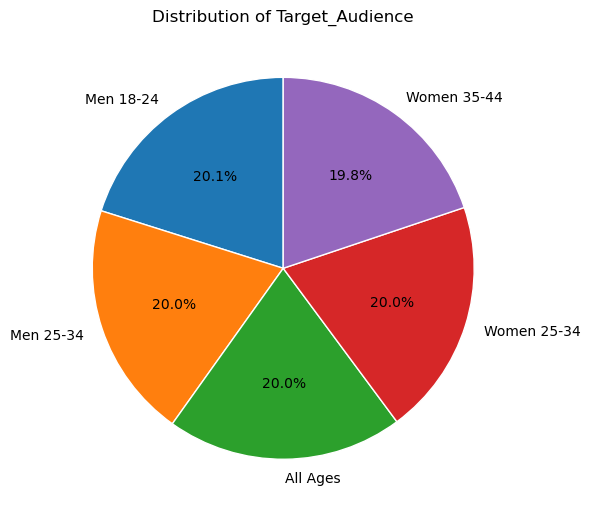

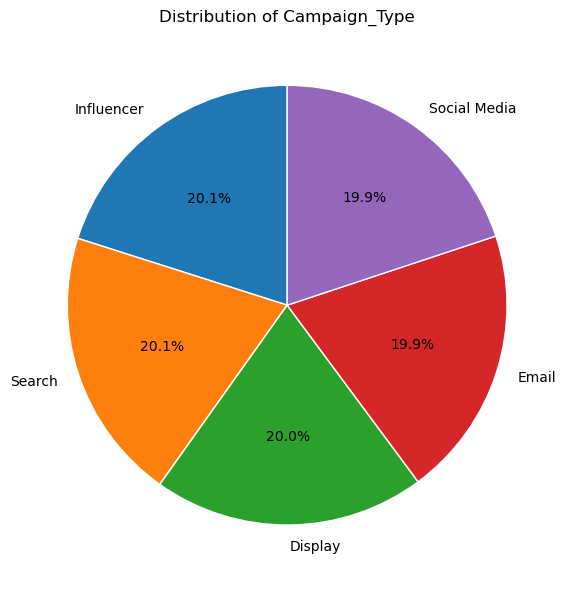

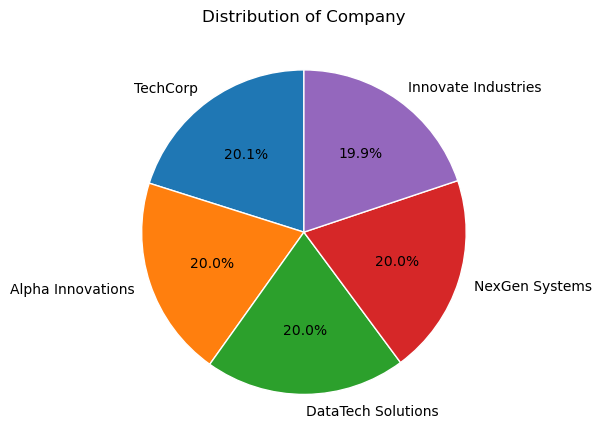

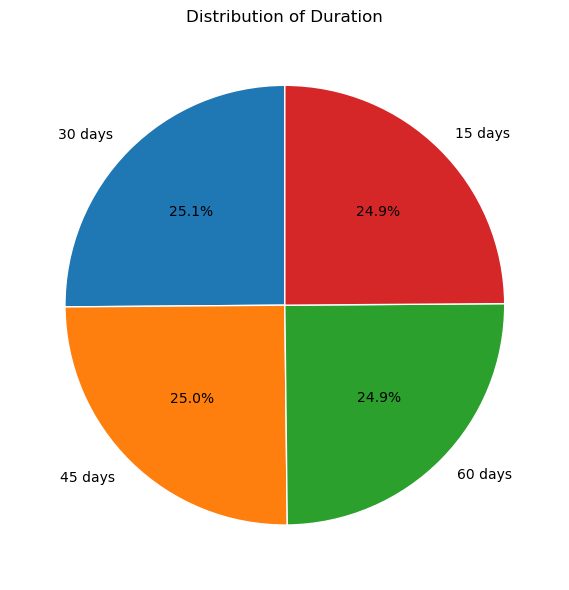

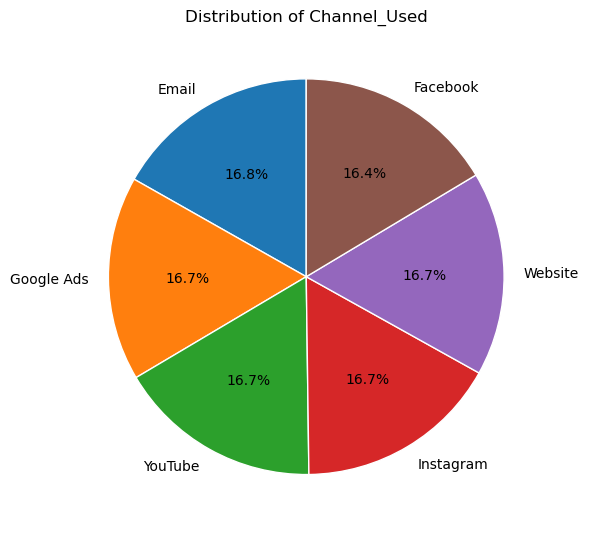

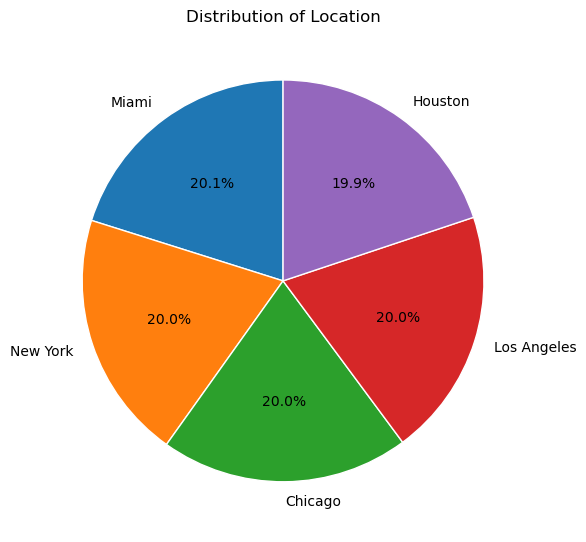

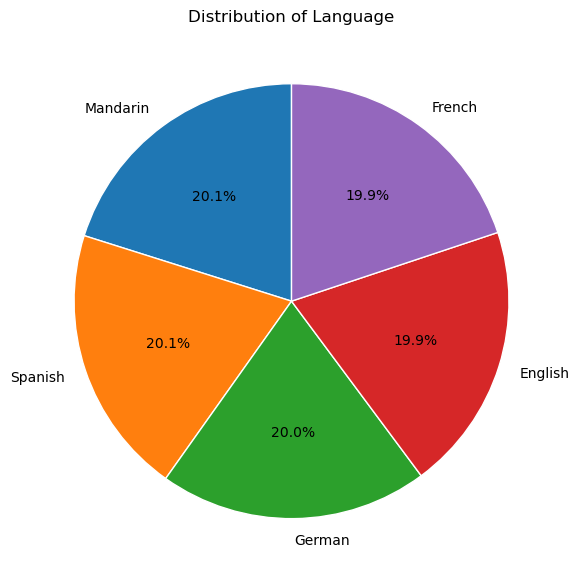

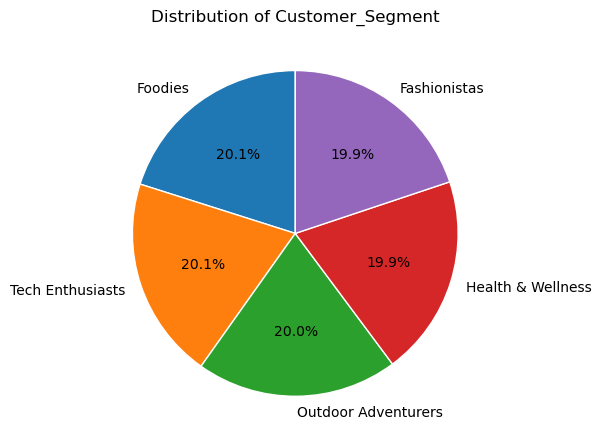

In [7]:
columns_to_plot = [
    'Target_Audience',
    'Campaign_Type', 
    'Company',
    'Duration',
    'Channel_Used',
    'Location',
    'Language',
    'Customer_Segment'
] 

for col in columns_to_plot:
    counts = df[col].value_counts()
    plt.figure(figsize=(6, 6))
    counts.plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title(f'Distribution of {col}')
    plt.ylabel('')  # Remove y-axis label
    plt.tight_layout()
    plt.show()

Each of these fields are showing a nearly uniform split across their unique values. This means that no single category should dominate any column and should not expect strong biases when using these features in a model. Now lets check for any seasonality in the data. 

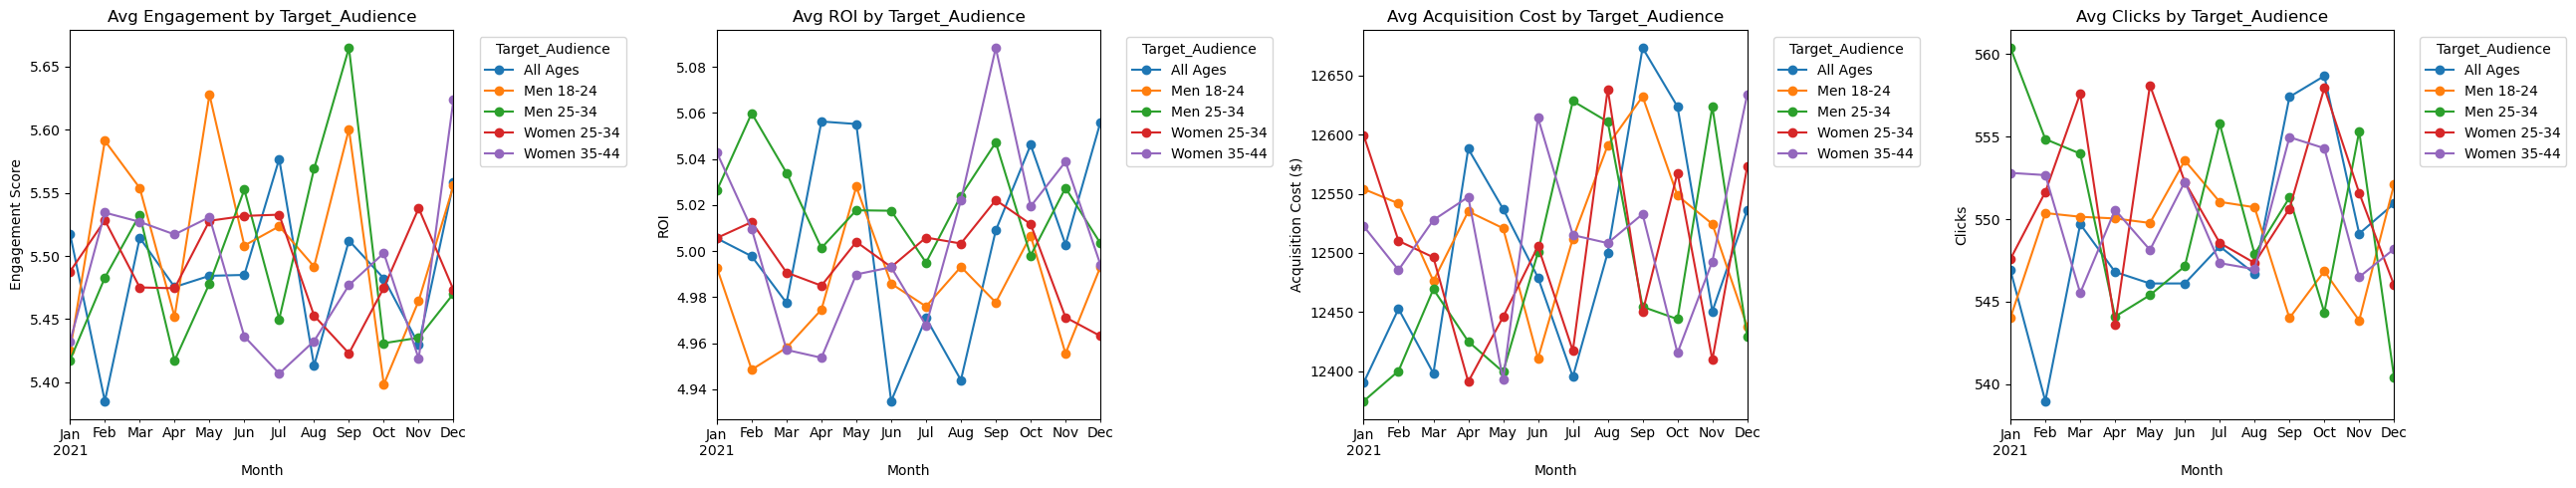

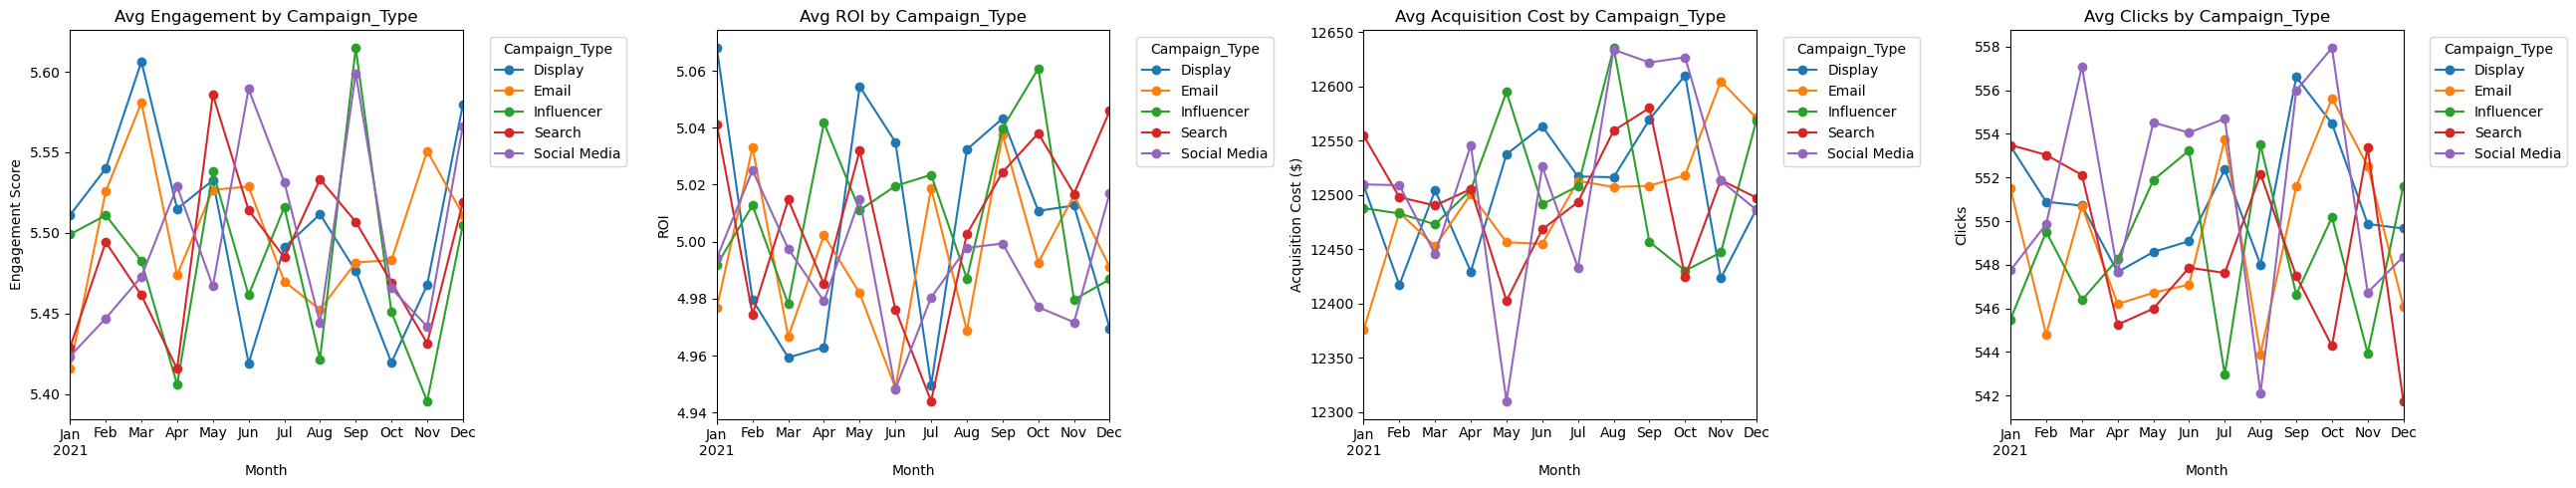

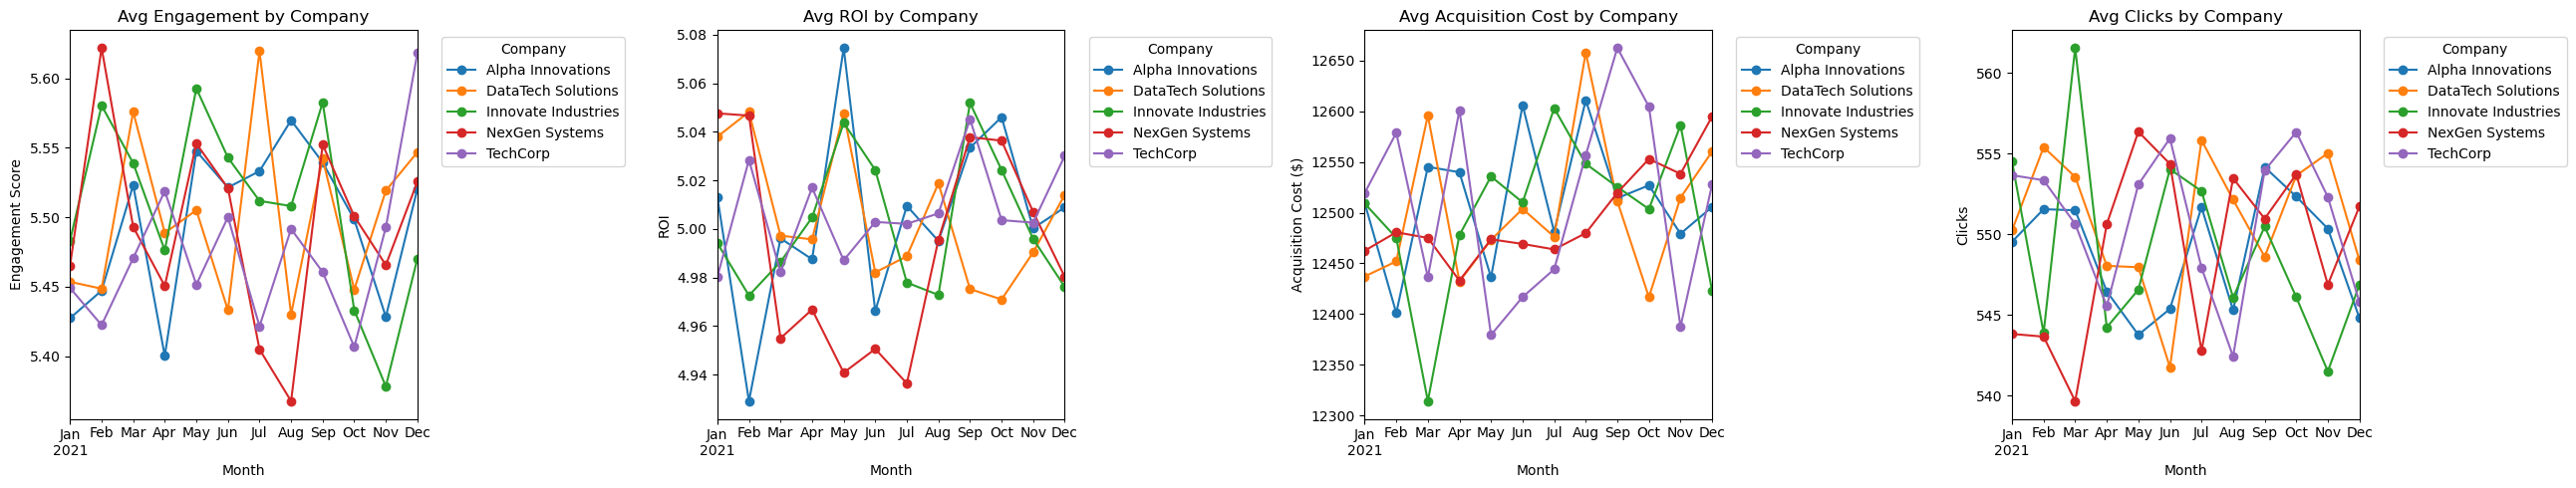

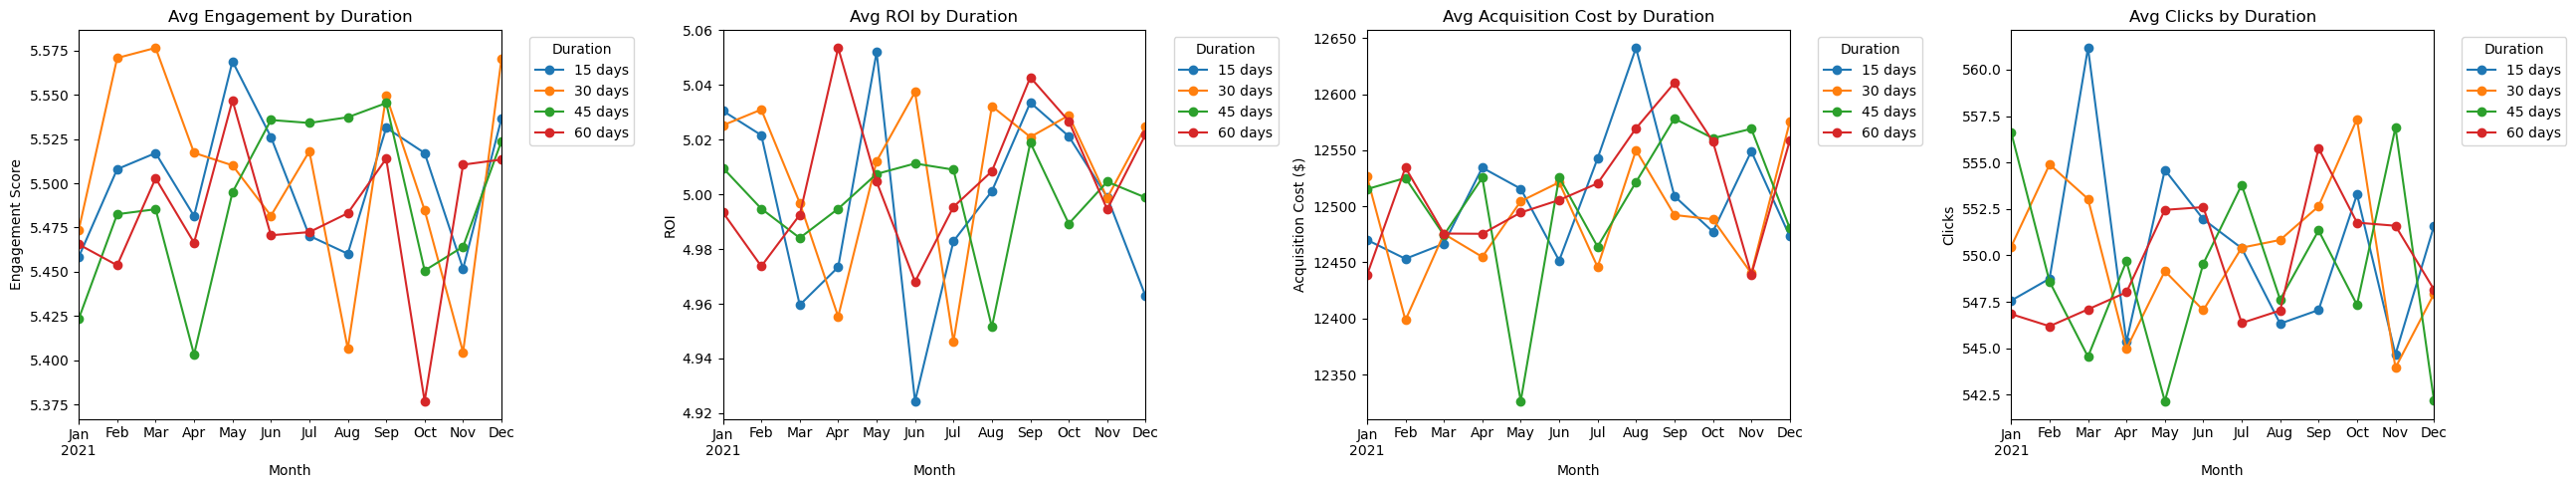

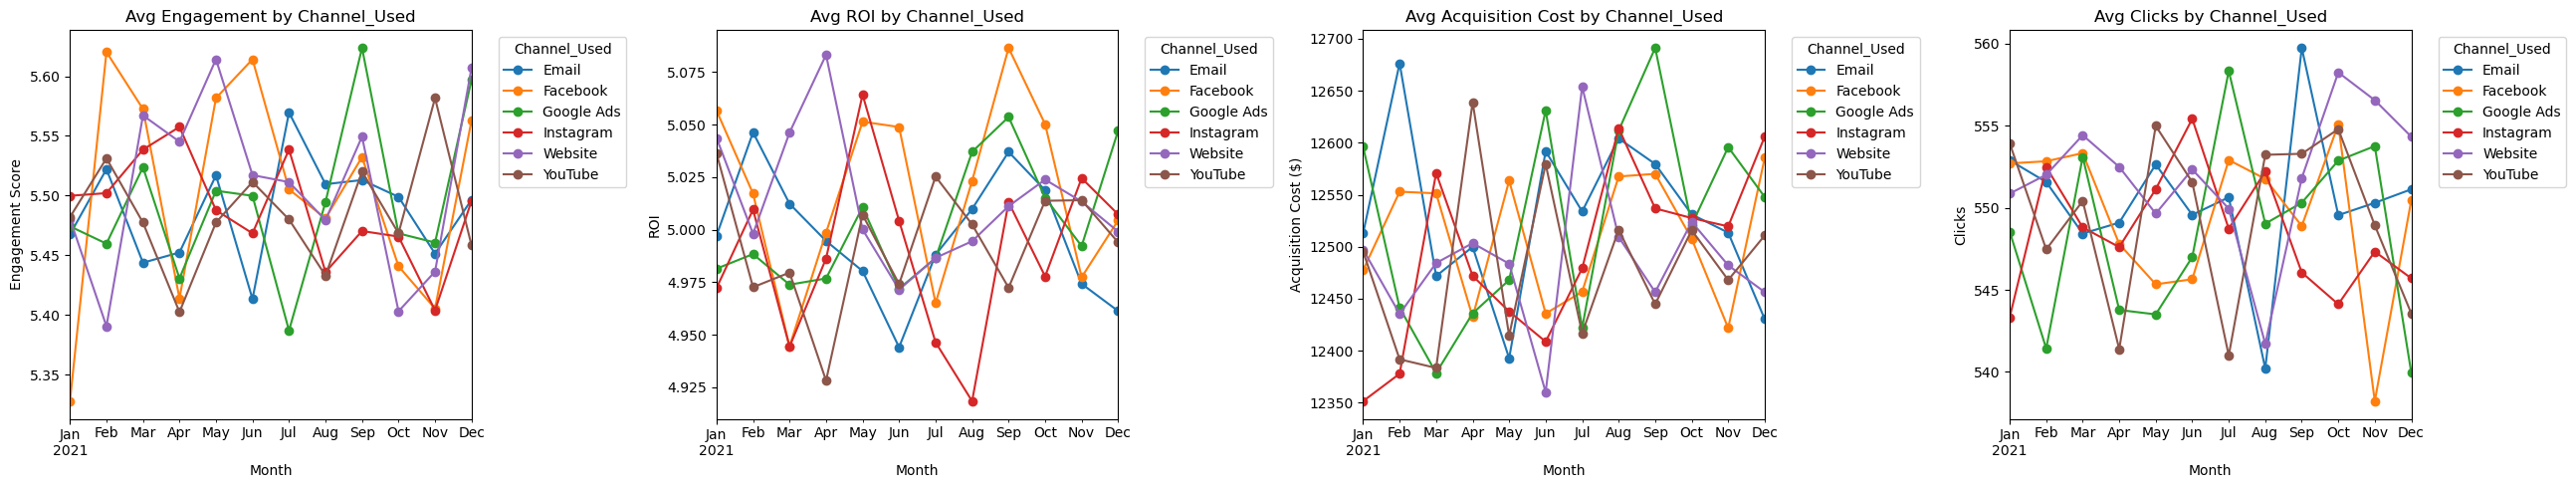

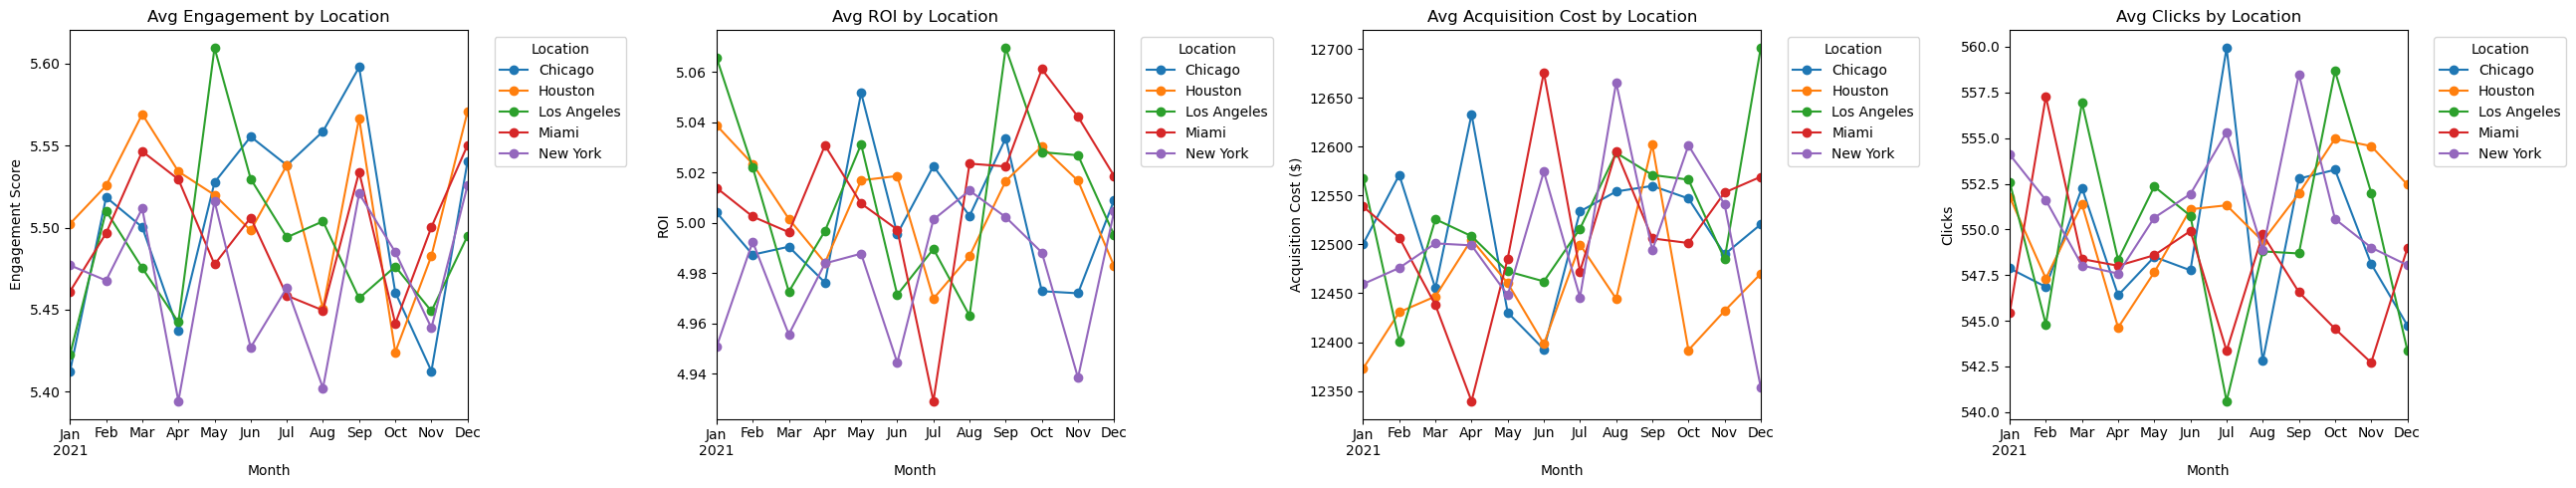

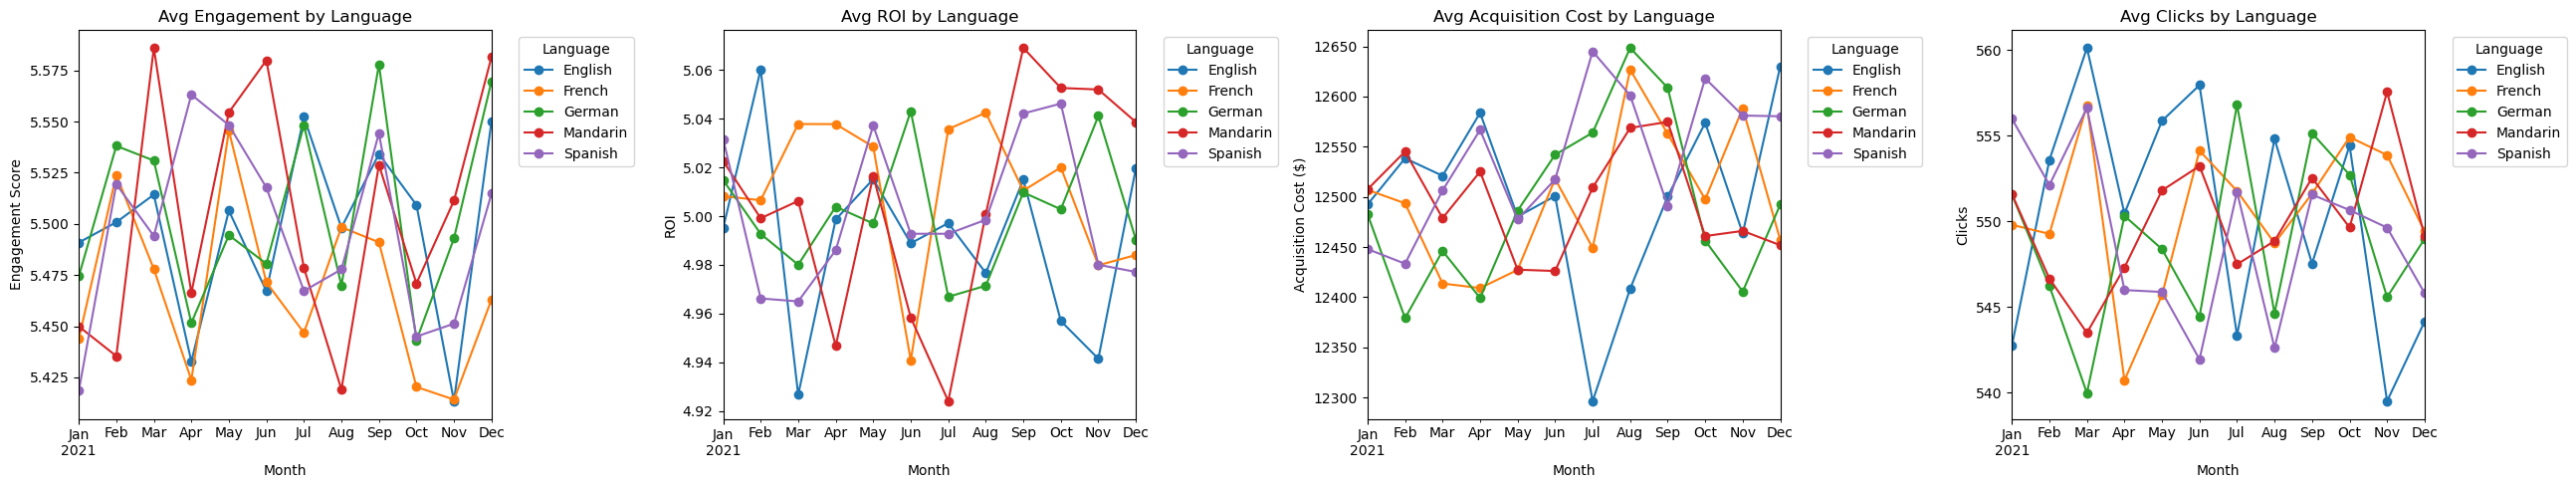

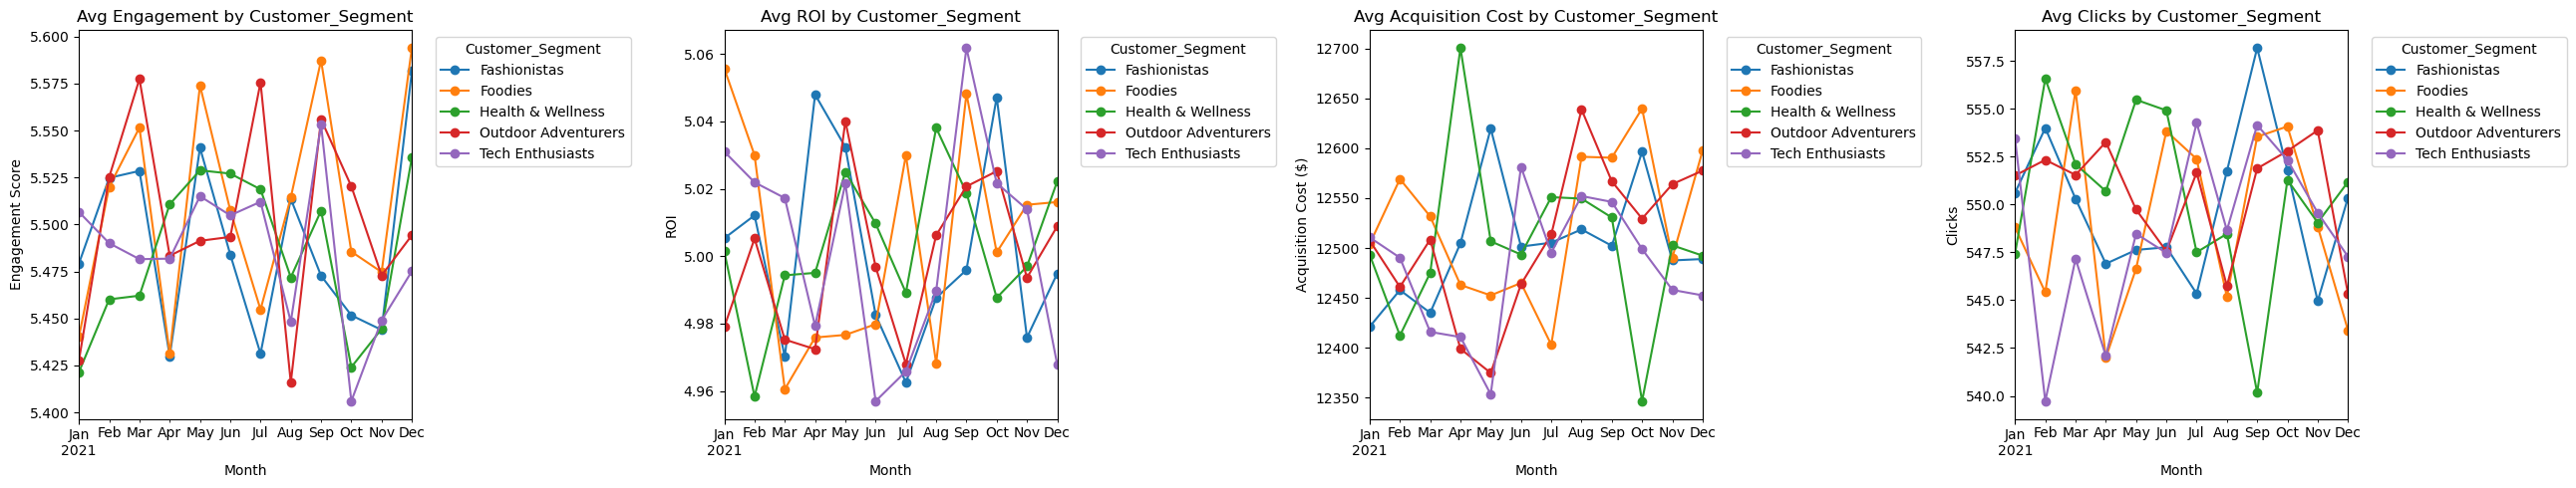

In [8]:


columns_to_plot = [
    'Target_Audience',
    'Campaign_Type', 
    'Company',
    'Duration',
    'Channel_Used',
    'Location',
    'Language',
    'Customer_Segment'
]

for col in columns_to_plot:
    monthly_engagement = (
        df
        .groupby([pd.Grouper(key='Date', freq='M'), col])['Engagement_Score']
        .mean()
        .unstack(col)
    )
    
    monthly_roi = (
        df
        .groupby([pd.Grouper(key='Date', freq='M'), col])['ROI']
        .mean()
        .unstack(col)
    )
    
    monthly_cost = (
        df
        .groupby([pd.Grouper(key='Date', freq='M'), col])['Acquisition_Cost']
        .mean()
        .unstack(col)
    )
    
    monthly_clicks = (
        df
        .groupby([pd.Grouper(key='Date', freq='M'), col])['Clicks']
        .mean()
        .unstack(col)
    )
    
    # Create 4 subplots
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(26, 5), sharex=True)
    
    monthly_engagement.plot(marker='o', linewidth=1.5, ax=ax1)
    ax1.set_title(f'Avg Engagement by {col}')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Engagement Score')
    ax1.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    monthly_roi.plot(marker='o', linewidth=1.5, ax=ax2)
    ax2.set_title(f'Avg ROI by {col}')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('ROI')
    ax2.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    monthly_cost.plot(marker='o', linewidth=1.5, ax=ax3)
    ax3.set_title(f'Avg Acquisition Cost by {col}')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Acquisition Cost ($)')
    ax3.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    monthly_clicks.plot(marker='o', linewidth=1.5, ax=ax4)
    ax4.set_title(f'Avg Clicks by {col}')
    ax4.set_xlabel('Month')
    ax4.set_ylabel('Clicks')
    ax4.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

There is clearly a seasonal pattern in the data for each category. Engagement, Clicks and ROI starting high in the year before dropping in the summer only to pick up again in the fall. For acquisition cost there seems to be a similar pattern expect a lot more spending is seen closer to the fall and winter. This leads us to believe we should include a month column or season column derived from the date column to encode into the model. 

/var/folders/l1/0bjrdwlj4cq8jpv771p83lg40000gn/T/ipykernel_4972/1742022284.py:104: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_original[correlation_cols].corr()


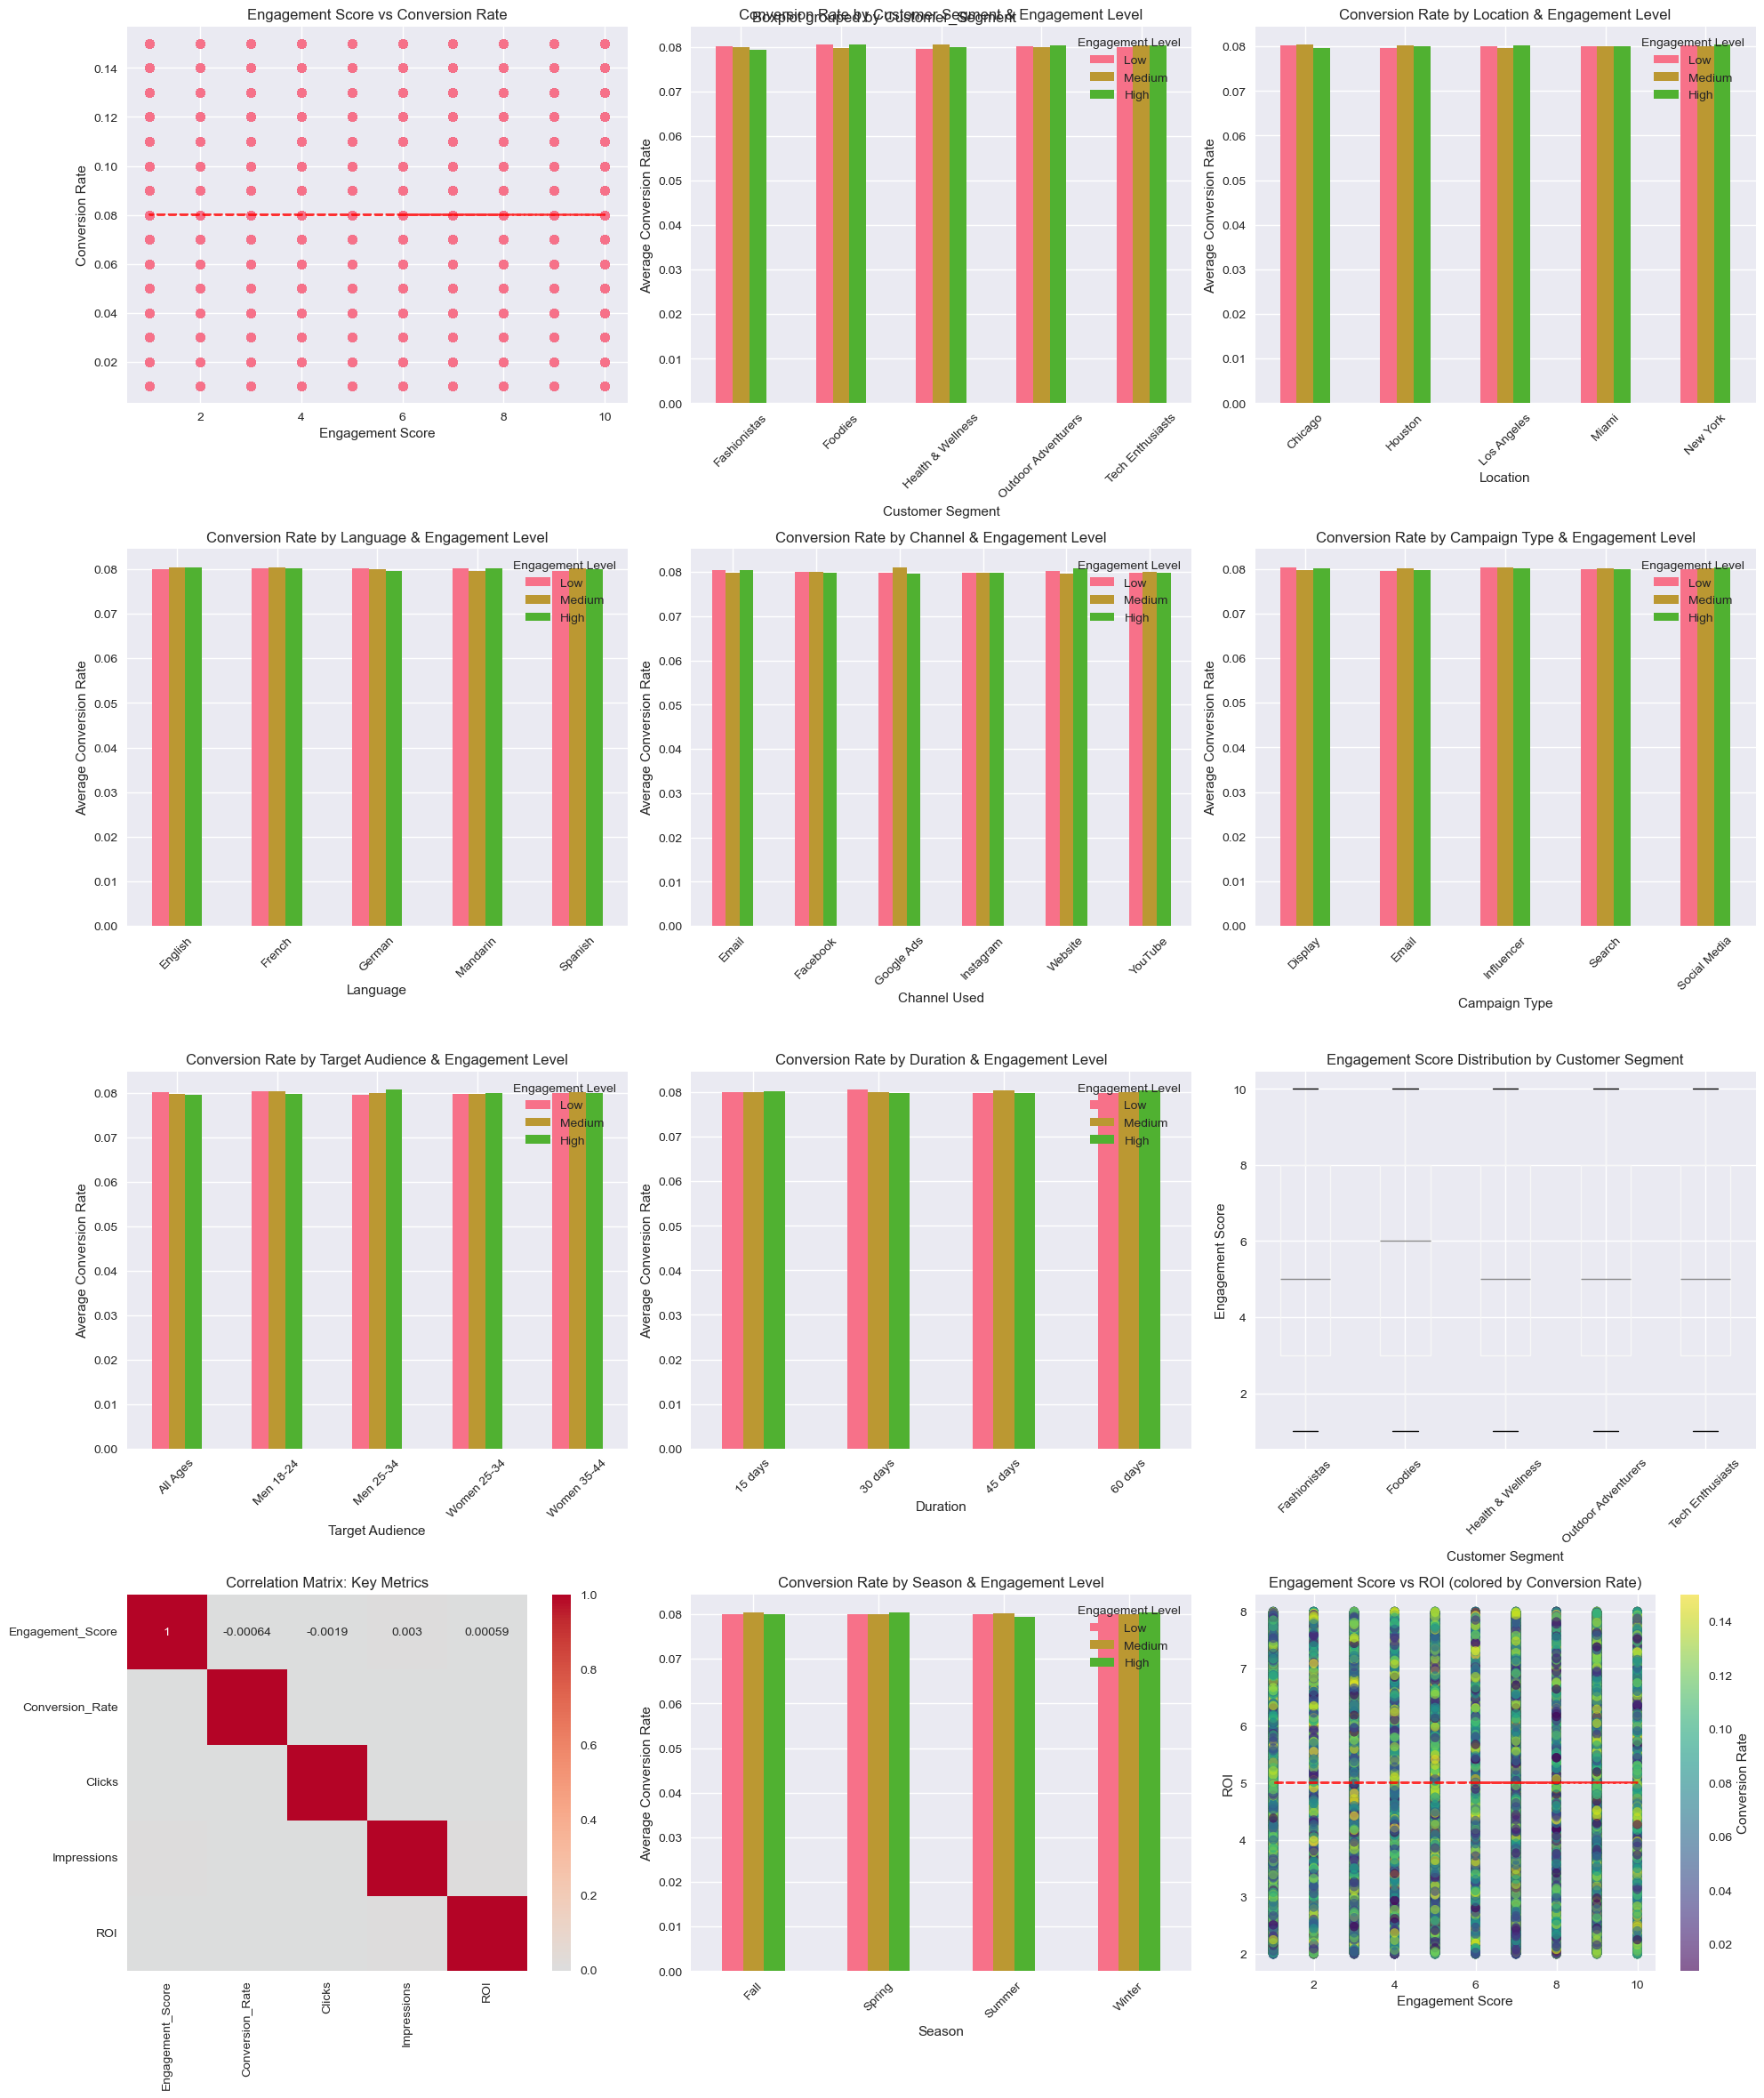

=== ENGAGEMENT vs CONVERSION RATE ANALYSIS ===
Overall correlation between Engagement Score and Conversion Rate: -0.001
Overall correlation between Engagement Score and ROI: 0.001

=== AVERAGE CONVERSION RATES BY ENGAGEMENT LEVEL ===
                      mean       std  count
Engagement_Score                           
Low (1-3)         0.080049  0.040660  80228
Medium (4-6)      0.080107  0.040539  59838
High (7-10)       0.080060  0.040586  59934

=== TOP PERFORMING COMBINATIONS ===
Top 10 Customer Segment + Channel combinations (High Engagement campaigns only):
       Customer_Segment Channel_Used      mean  count
10              Foodies      Website  0.081245   2738
17    Health & Wellness      YouTube  0.081229   2710
12    Health & Wellness        Email  0.080974   2609
28     Tech Enthusiasts      Website  0.080892   2692
18  Outdoor Adventurers        Email  0.080871   2651
22  Outdoor Adventurers      Website  0.080814   2740
8               Foodies   Google Ads  0.080744   2

In [9]:
#data exploration2

# Load the original dataset before encoding to examine relationships
df_original = pd.read_csv('./data/marketing_campaign_dataset.csv')

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create figure with subplots for comprehensive analysis
fig = plt.figure(figsize=(20, 24))

# 1. Engagement Score vs Conversion Rate - Main relationship
plt.subplot(4, 3, 1)
plt.scatter(df_original['Engagement_Score'], df_original['Conversion_Rate'], alpha=0.6, s=50)
plt.xlabel('Engagement Score')
plt.ylabel('Conversion Rate')
plt.title('Engagement Score vs Conversion Rate')
z = np.polyfit(df_original['Engagement_Score'], df_original['Conversion_Rate'], 1)
p = np.poly1d(z)
plt.plot(df_original['Engagement_Score'], p(df_original['Engagement_Score']), "r--", alpha=0.8)

# 2. Customer Segments vs Conversion Rate by Engagement
plt.subplot(4, 3, 2)
segment_engagement = df_original.groupby(['Customer_Segment', pd.cut(df_original['Engagement_Score'], bins=3, labels=['Low', 'Medium', 'High'])])['Conversion_Rate'].mean().unstack()
segment_engagement.plot(kind='bar', ax=plt.gca())
plt.title('Conversion Rate by Customer Segment & Engagement Level')
plt.xlabel('Customer Segment')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Engagement Level')

# 3. Location vs Conversion Rate by Engagement
plt.subplot(4, 3, 3)
location_data = df_original.groupby(['Location', pd.cut(df_original['Engagement_Score'], bins=3, labels=['Low', 'Medium', 'High'])])['Conversion_Rate'].mean().unstack()
location_data.plot(kind='bar', ax=plt.gca())
plt.title('Conversion Rate by Location & Engagement Level')
plt.xlabel('Location')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Engagement Level')

# 4. Language vs Conversion Rate by Engagement
plt.subplot(4, 3, 4)
language_data = df_original.groupby(['Language', pd.cut(df_original['Engagement_Score'], bins=3, labels=['Low', 'Medium', 'High'])])['Conversion_Rate'].mean().unstack()
language_data.plot(kind='bar', ax=plt.gca())
plt.title('Conversion Rate by Language & Engagement Level')
plt.xlabel('Language')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Engagement Level')

# 5. Channel Used vs Conversion Rate by Engagement
plt.subplot(4, 3, 5)
channel_data = df_original.groupby(['Channel_Used', pd.cut(df_original['Engagement_Score'], bins=3, labels=['Low', 'Medium', 'High'])])['Conversion_Rate'].mean().unstack()
channel_data.plot(kind='bar', ax=plt.gca())
plt.title('Conversion Rate by Channel & Engagement Level')
plt.xlabel('Channel Used')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Engagement Level')

# 6. Campaign Type vs Conversion Rate by Engagement
plt.subplot(4, 3, 6)
campaign_data = df_original.groupby(['Campaign_Type', pd.cut(df_original['Engagement_Score'], bins=3, labels=['Low', 'Medium', 'High'])])['Conversion_Rate'].mean().unstack()
campaign_data.plot(kind='bar', ax=plt.gca())
plt.title('Conversion Rate by Campaign Type & Engagement Level')
plt.xlabel('Campaign Type')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Engagement Level')

# 7. Target Audience vs Conversion Rate by Engagement
plt.subplot(4, 3, 7)
audience_data = df_original.groupby(['Target_Audience', pd.cut(df_original['Engagement_Score'], bins=3, labels=['Low', 'Medium', 'High'])])['Conversion_Rate'].mean().unstack()
audience_data.plot(kind='bar', ax=plt.gca())
plt.title('Conversion Rate by Target Audience & Engagement Level')
plt.xlabel('Target Audience')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Engagement Level')

# 8. Duration vs Conversion Rate by Engagement (if Duration has seasons/periods)
plt.subplot(4, 3, 8)
duration_data = df_original.groupby(['Duration', pd.cut(df_original['Engagement_Score'], bins=3, labels=['Low', 'Medium', 'High'])])['Conversion_Rate'].mean().unstack()
duration_data.plot(kind='bar', ax=plt.gca())
plt.title('Conversion Rate by Duration & Engagement Level')
plt.xlabel('Duration')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Engagement Level')

# 9. Engagement Score Distribution by Customer Segment
plt.subplot(4, 3, 9)
df_original.boxplot(column='Engagement_Score', by='Customer_Segment', ax=plt.gca())
plt.title('Engagement Score Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)

# 10. Heatmap: Correlation between Engagement, Conversion Rate, and other metrics
plt.subplot(4, 3, 10)
correlation_cols = ['Engagement_Score', 'Conversion_Rate', 'Clicks', 'Impressions', 'Acquisition_Cost', 'ROI']
correlation_matrix = df_original[correlation_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=plt.gca())
plt.title('Correlation Matrix: Key Metrics')

# 11. Engagement vs Conversion Rate by Season (if Date column allows season extraction)
plt.subplot(4, 3, 11)
if 'Date' in df_original.columns:
    df_original['Date'] = pd.to_datetime(df_original['Date'])
    df_original['Season'] = df_original['Date'].dt.month.map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                                               3: 'Spring', 4: 'Spring', 5: 'Spring',
                                                               6: 'Summer', 7: 'Summer', 8: 'Summer',
                                                               9: 'Fall', 10: 'Fall', 11: 'Fall'})
    season_data = df_original.groupby(['Season', pd.cut(df_original['Engagement_Score'], bins=3, labels=['Low', 'Medium', 'High'])])['Conversion_Rate'].mean().unstack()
    season_data.plot(kind='bar', ax=plt.gca())
    plt.title('Conversion Rate by Season & Engagement Level')
    plt.xlabel('Season')
    plt.ylabel('Average Conversion Rate')
    plt.xticks(rotation=45)
    plt.legend(title='Engagement Level')
else:
    plt.text(0.5, 0.5, 'Date column not available\nfor season analysis', 
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.title('Season Analysis (Data Not Available)')

# 12. Engagement Score vs ROI (Secondary relationship)
plt.subplot(4, 3, 12)
plt.scatter(df_original['Engagement_Score'], df_original['ROI'], alpha=0.6, s=50, c=df_original['Conversion_Rate'], cmap='viridis')
plt.xlabel('Engagement Score')
plt.ylabel('ROI')
plt.title('Engagement Score vs ROI (colored by Conversion Rate)')
plt.colorbar(label='Conversion Rate')
z2 = np.polyfit(df_original['Engagement_Score'], df_original['ROI'], 1)
p2 = np.poly1d(z2)
plt.plot(df_original['Engagement_Score'], p2(df_original['Engagement_Score']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Summary statistics
print("=== ENGAGEMENT vs CONVERSION RATE ANALYSIS ===")
print(f"Overall correlation between Engagement Score and Conversion Rate: {df_original['Engagement_Score'].corr(df_original['Conversion_Rate']):.3f}")
print(f"Overall correlation between Engagement Score and ROI: {df_original['Engagement_Score'].corr(df_original['ROI']):.3f}")

print("\n=== AVERAGE CONVERSION RATES BY ENGAGEMENT LEVEL ===")
engagement_bins = pd.cut(df_original['Engagement_Score'], bins=3, labels=['Low (1-3)', 'Medium (4-6)', 'High (7-10)'])
conversion_by_engagement = df_original.groupby(engagement_bins)['Conversion_Rate'].agg(['mean', 'std', 'count'])
print(conversion_by_engagement)

print("\n=== TOP PERFORMING COMBINATIONS ===")
# Find best performing segment-channel combinations by high engagement
high_engagement = df_original[df_original['Engagement_Score'] >= 7]
if len(high_engagement) > 0:
    top_combinations = high_engagement.groupby(['Customer_Segment', 'Channel_Used'])['Conversion_Rate'].agg(['mean', 'count']).reset_index()
    top_combinations = top_combinations[top_combinations['count'] >= 5]  # Only combinations with sufficient data
    top_combinations = top_combinations.sort_values('mean', ascending=False).head(10)
    print("Top 10 Customer Segment + Channel combinations (High Engagement campaigns only):")
    print(top_combinations)

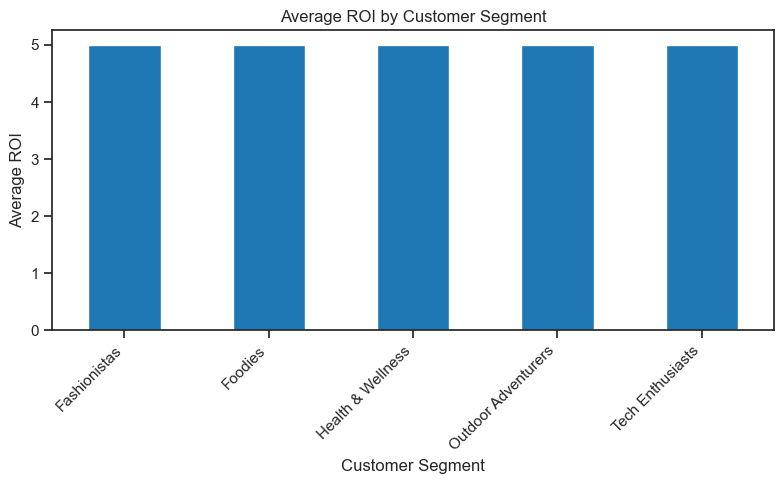

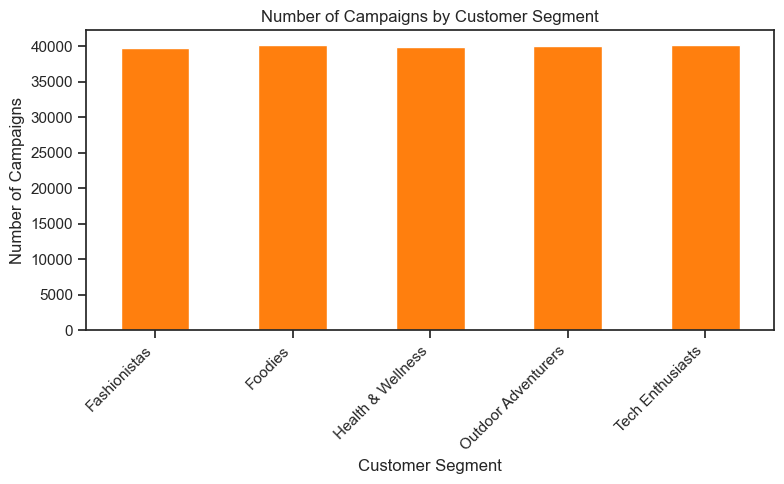

In [38]:
roi_by_segment = df.groupby('Customer_Segment')['ROI'].mean().sort_index()
count_by_segment = df['Customer_Segment'].value_counts().sort_index()

# Plot average ROI per customer segment
plt.figure(figsize=(8, 5))
roi_by_segment.plot.bar(color='#1f77b4')
plt.title('Average ROI by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average ROI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot number of campaigns per customer segment
plt.figure(figsize=(8, 5))
count_by_segment.plot.bar(color='#ff7f0e')
plt.title('Number of Campaigns by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
df['Month'] = df['Date'].dt.month

season_map = {
    1: 'Winter',  2: 'Winter',  3: 'Spring',
    4: 'Spring',  5: 'Spring',  6: 'Summer',
    7: 'Summer',  8: 'Summer',  9: 'Fall',
    10: 'Fall',   11: 'Fall',   12: 'Winter'
}
df['Season'] = df['Month'].map(season_map)  

#drop date and month columns because we have season column 
df = df.drop(columns=['Date', 'Month']) 
df.head()

Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  Channel_Used  Conversion_Rate  Acquisition_Cost   ROI     Location  \
0   Google Ads             0.04           16174.0  6.29      Chicago   
1   Google Ads             0.12           11566.0  5.61     New York   
2      YouTube             0.07           10200.0  7.18  Los Angeles   
3      YouTube             0.11           12724.0  5.55        Miami   
4      YouTube             0.05           16452.0  6.50  Los Angeles   

   Language  Clicks  Impressions  Engagement_Score     Customer_Segment  \
0   Spanish     506         1922                 6    Health & Wellness   
1    German     116         7523                 7         Fashionistas   
2    French     584         7698                 1  Outdoor Adventurers   
3  Mandarin     217         1820                 7    Health & Wellness   
4  Mandarin     379         4201                 3    Health & Wellness   

   Season  
0  Winter  
1  Winter  
2  Winter  
3  Winter  
4  Winter

# Encoding:

One‐hot encode the following columns, dont need company column because it doesnt add any value to the model espcecially when users arent even going to be able to select the company. Deciding to drop the company column to generalize the model to any brand. 


In [ ]:
df = df.drop(columns=['Company']) 
#also drop campaign_id column because it doesnt add any value to the model 
df = df.drop(columns=['Campaign_ID'])  

#roi is not working well as a target variable, so we will drop it we have to focus on something else like clicks, impressions, engagement.  
df = df.drop(columns=['ROI']) 
#lets now also get rid of aquisition cost because its a noisy variable that users 

df_encoded = pd.get_dummies(
    df,
    columns=[
        'Campaign_Type',
        'Target_Audience',
        'Channel_Used',
        'Location',
        'Language',
        'Customer_Segment',
        'Season',
    ],
    drop_first=False
)  

# mapping from “Duration” column to ordinal integers
duration_map = {
    '15 days': 0,
    '30 days': 1,
    '45 days': 2,
    '60 days': 3
}

# Apply the mapping
df_encoded['Duration_encoded'] = df_encoded['Duration'].replace(duration_map)  
#drop og duration column because we have duration_encoded columns 
df_encoded = df_encoded.drop(columns=['Duration'])
df_encoded.head() 



Conversion_Rate  Acquisition_Cost   ROI  Clicks  Impressions  \
0             0.04           16174.0  6.29     506         1922   
1             0.12           11566.0  5.61     116         7523   
2             0.07           10200.0  7.18     584         7698   
3             0.11           12724.0  5.55     217         1820   
4             0.05           16452.0  6.50     379         4201   

   Engagement_Score  Campaign_Type_Display  Campaign_Type_Email  \
0                 6                      0                    1   
1                 7                      0                    1   
2                 1                      0                    0   
3                 7                      1                    0   
4                 3                      0                    1   

   Campaign_Type_Influencer  Campaign_Type_Search  ...  \
0                         0                     0  ...   
1                         0                     0  ...   
2                         1                     0  ...   
3                         0                     0  ...   
4                         0                     0  ...   

   Customer_Segment_Fashionistas  Customer_Segment_Foodies  \
0                              0                         0   
1                              1                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   

   Customer_Segment_Health & Wellness  Customer_Segment_Outdoor Adventurers  \
0                                   1                                     0   
1                                   0                                     0   
2                                   0                                     1   
3                                   1                                     0   
4                                   1                                     0   

   Customer_Segment_Tech Enthusiasts  Season_Fall  Season_Spring  \
0                                  0            0              0   
1                                  0            0              0   
2                                  0            0              0   
3                                  0            0              0   
4                                  0            0              0   

   Season_Summer  Season_Winter  Duration_encoded  
0              0              1                 1  
1              0              1                 3  
2              0              1                 1  
3              0              1                 3  
4              0              1                 0  

[5 rows x 42 columns]

In [41]:
#display all columns from df_encoded
df_encoded.columns

Index(['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions',
       'Engagement_Score', 'Campaign_Type_Display', 'Campaign_Type_Email',
       'Campaign_Type_Influencer', 'Campaign_Type_Search',
       'Campaign_Type_Social Media', 'Target_Audience_All Ages',
       'Target_Audience_Men 18-24', 'Target_Audience_Men 25-34',
       'Target_Audience_Women 25-34', 'Target_Audience_Women 35-44',
       'Channel_Used_Email', 'Channel_Used_Facebook',
       'Channel_Used_Google Ads', 'Channel_Used_Instagram',
       'Channel_Used_Website', 'Channel_Used_YouTube', 'Location_Chicago',
       'Location_Houston', 'Location_Los Angeles', 'Location_Miami',
       'Location_New York', 'Language_English', 'Language_French',
       'Language_German', 'Language_Mandarin', 'Language_Spanish',
       'Customer_Segment_Fashionistas', 'Customer_Segment_Foodies',
       'Customer_Segment_Health & Wellness',
       'Customer_Segment_Outdoor Adventurers',
       'Customer_Segment_Tech Enthusi

# Normalization
## MinMaxScaler to scale numeric features in the same 0,1 range: 

In [42]:
# List of numeric columns to normalize, not scaling ROI because that is the target variable
numeric_cols = [
    'Conversion_Rate', 
    'Acquisition_Cost',  
    'Clicks', 
    'Impressions', 
    'Engagement_Score', 
    'Duration_encoded'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols]) 

df_encoded.head()

Conversion_Rate  Acquisition_Cost   ROI    Clicks  Impressions  \
0         0.214286          0.744933  6.29  0.451111     0.102444   
1         0.785714          0.437733  5.61  0.017778     0.724778   
2         0.428571          0.346667  7.18  0.537778     0.744222   
3         0.714286          0.514933  5.55  0.130000     0.091111   
4         0.285714          0.763467  6.50  0.310000     0.355667   

   Engagement_Score  Campaign_Type_Display  Campaign_Type_Email  \
0          0.555556                      0                    1   
1          0.666667                      0                    1   
2          0.000000                      0                    0   
3          0.666667                      1                    0   
4          0.222222                      0                    1   

   Campaign_Type_Influencer  Campaign_Type_Search  ...  \
0                         0                     0  ...   
1                         0                     0  ...   
2                         1                     0  ...   
3                         0                     0  ...   
4                         0                     0  ...   

   Customer_Segment_Fashionistas  Customer_Segment_Foodies  \
0                              0                         0   
1                              1                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   

   Customer_Segment_Health & Wellness  Customer_Segment_Outdoor Adventurers  \
0                                   1                                     0   
1                                   0                                     0   
2                                   0                                     1   
3                                   1                                     0   
4                                   1                                     0   

   Customer_Segment_Tech Enthusiasts  Season_Fall  Season_Spring  \
0                                  0            0              0   
1                                  0            0              0   
2                                  0            0              0   
3                                  0            0              0   
4                                  0            0              0   

   Season_Summer  Season_Winter  Duration_encoded  
0              0              1          0.333333  
1              0              1          1.000000  
2              0              1          0.333333  
3              0              1          1.000000  
4              0              1          0.000000  

[5 rows x 42 columns]

In [43]:
sns.set_theme(style='ticks', palette='viridis')
pairgrid = sns.pairplot(
    data=df_encoded,
    diag_kind='kde',               # KDE on the diagonal
    plot_kws={'alpha': 0.6, 's': 20},  # Semi-transparent points
    corner=True                    # Only show the lower triangle to reduce clutter
)

plt.tight_layout()
plt.show()

## lets now export the encoded dataset to a csv for the model's to use for training

In [44]:
output_path = './data/df_encoded_for_training.csv'
df_encoded.to_csv(output_path, index=False)
print(f"✅ Exported encoded DataFrame to '{output_path}'")

✅ Exported encoded DataFrame to './data/df_encoded_for_training.csv'
